In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
orders = pd.read_csv("orders_cleaned.csv")

In [2]:
orders.head(10)

Order ID  Order Date       Ship Mode Customer ID      Segment  \
0   CA-2012-124891  2012-07-31        Same Day    RH-19495     Consumer   
1    IN-2013-77878  2013-02-05    Second Class    JR-16210    Corporate   
2    IN-2013-71249  2013-10-17     First Class    CR-12730     Consumer   
3  ES-2013-1579342  2013-01-28     First Class    KM-16375  Home Office   
4     SG-2013-4320  2013-11-05        Same Day     RH-9495     Consumer   
5    IN-2013-42360  2013-06-28    Second Class    JM-15655    Corporate   
6    IN-2011-81826  2011-11-07     First Class    TS-21340     Consumer   
7    IN-2012-86369  2012-04-14  Standard Class    MB-18085     Consumer   
8   CA-2014-135909  2014-10-14  Standard Class    JW-15220    Corporate   
9   CA-2012-116638  2012-01-28    Second Class    JH-15985     Consumer   

         Country  Market        Product ID         Category Sub-Category  \
0  United States      US   TEC-AC-10003033       Technology  Accessories   
1      Australia    APAC   FUR-CH-10003950        Furniture       Chairs   
2      Australia    APAC   TEC-PH-10004664       Technology       Phones   
3        Germany      EU   TEC-PH-10004583       Technology       Phones   
4        Senegal  Africa  TEC-SHA-10000501       Technology      Copiers   
5      Australia    APAC   TEC-PH-10000030       Technology       Phones   
6    New Zealand    APAC   FUR-CH-10004050        Furniture       Chairs   
7    New Zealand    APAC   FUR-TA-10002958        Furniture       Tables   
8  United States      US   OFF-BI-10003527  Office Supplies      Binders   
9  United States      US   FUR-TA-10000198        Furniture       Tables   

      Sales  Quantity  Discount     Profit  Shipping Cost Order Priority  \
0  2309.650         7       0.0   762.1845         933.57       Critical   
1  3709.395         9       0.1  -288.7650         923.63       Critical   
2  5175.171         9       0.1   919.9710         915.49         Medium   
3  2892.510         5       0.1   -96.5400         910.16         Medium   
4  2832.960         8       0.0   311.5200         903.04       Critical   
5  2862.675         5       0.1   763.2750         897.35       Critical   
6  1822.080         4       0.0   564.8400         894.77       Critical   
7  5244.840         6       0.0   996.4800         878.38           High   
8  5083.960         5       0.2  1906.4850         867.69            Low   
9  4297.644        13       0.4 -1862.3124         865.74       Critical   

   Total Sales  
0    16167.550  
1    33384.555  
2    46576.539  
3    14462.550  
4    22663.680  
5    14313.375  
6     7288.320  
7    31469.040  
8    25419.800  
9    55869.372

In [3]:
#all values in order ID are unique
orders['Order ID'].unique()

array(['CA-2012-124891', 'IN-2013-77878', 'IN-2013-71249',
       'ES-2013-1579342', 'SG-2013-4320', 'IN-2013-42360',
       'IN-2011-81826', 'IN-2012-86369', 'CA-2014-135909',
       'CA-2012-116638', 'CA-2011-102988', 'ID-2012-28402',
       'SA-2011-1830', 'MX-2012-130015', 'IN-2013-73951',
       'ES-2014-5099955', 'CA-2014-143567', 'ES-2014-1651774',
       'IN-2014-11763', 'TZ-2014-8190', 'PL-2012-7820', 'CA-2011-154627',
       'IN-2011-44803', 'ES-2013-2860574', 'US-2014-133193',
       'MX-2014-165309', 'IN-2011-10286', 'ES-2011-4699764',
       'CA-2013-159016', 'IN-2012-44810', 'US-2011-128776',
       'ES-2012-5870268', 'CA-2012-139731', 'IN-2011-28087',
       'CA-2011-168494', 'CG-2011-8610', 'CA-2011-160766',
       'US-2014-168116', 'ES-2014-2637201', 'IN-2011-61302',
       'ID-2013-63976', 'IN-2014-37320', 'IN-2014-76016',
       'ES-2012-5877219', 'IT-2011-3183678', 'CA-2011-116904',
       'IT-2013-3085011', 'IN-2014-50473', 'IN-2014-35983',
       'MX-2014-126984',

In [4]:
#group the dataset
order_group=orders.groupby(['Order ID','Sub-Category'])['Total Sales'].sum().\
unstack().reset_index().fillna(0).set_index('Order ID')

order_group

Sub-Category    Accessories  Appliances  Binders  Bookcases  Chairs  Copiers  \
Order ID                                                                       
AG-2011-8180           0.00         0.0      0.0        0.0     0.0      0.0   
AJ-2013-2640           0.00         0.0      0.0        0.0     0.0      0.0   
AL-2011-7440           0.00         0.0      0.0        0.0     0.0      0.0   
AL-2013-3830           0.00         0.0      0.0        0.0     0.0      0.0   
AO-2011-1670           0.00         0.0      0.0    14871.6     0.0      0.0   
...                     ...         ...      ...        ...     ...      ...   
US-2014-167402         0.00         0.0      0.0        0.0     0.0      0.0   
US-2014-168046         0.00         0.0      0.0        0.0     0.0      0.0   
US-2014-168116         0.00         0.0      0.0        0.0     0.0      0.0   
WA-2014-7260        8784.72         0.0      0.0        0.0     0.0      0.0   
ZA-2011-8980           0.00         0.0      0.0        0.0     0.0      0.0   

Sub-Category    Furnishings  Machines   Phones  Storage  Supplies   Tables  
Order ID                                                                    
AG-2011-8180            0.0   1226.52     0.00      0.0      0.00     0.00  
AJ-2013-2640            0.0      0.00     0.00      0.0      0.00  8232.00  
AL-2011-7440            0.0  16191.00     0.00      0.0      0.00     0.00  
AL-2013-3830            0.0      0.00  2215.68      0.0      0.00     0.00  
AO-2011-1670            0.0      0.00     0.00      0.0      0.00     0.00  
...                     ...       ...      ...      ...       ...      ...  
US-2014-167402          0.0      0.00     0.00      0.0  20820.25     0.00  
US-2014-168046          0.0      0.00     0.00      0.0      0.00  2180.16  
US-2014-168116          0.0  31999.92     0.00      0.0      0.00     0.00  
WA-2014-7260            0.0      0.00     0.00      0.0      0.00     0.00  
ZA-2011-8980            0.0      0.00     0.00      0.0      0.00  8537.76  

[954 rows x 12 columns]

In [5]:
#one hot encoding, done to convert into binary values

def encode(x): 
    if(x<= 0): 
        return 0
    if(x>= 1): 
        return 1
    
order_encoded=order_group.applymap(encode)
order_encoded


Sub-Category    Accessories  Appliances  Binders  Bookcases  Chairs  Copiers  \
Order ID                                                                       
AG-2011-8180              0           0        0          0       0        0   
AJ-2013-2640              0           0        0          0       0        0   
AL-2011-7440              0           0        0          0       0        0   
AL-2013-3830              0           0        0          0       0        0   
AO-2011-1670              0           0        0          1       0        0   
...                     ...         ...      ...        ...     ...      ...   
US-2014-167402            0           0        0          0       0        0   
US-2014-168046            0           0        0          0       0        0   
US-2014-168116            0           0        0          0       0        0   
WA-2014-7260              1           0        0          0       0        0   
ZA-2011-8980              0           0        0          0       0        0   

Sub-Category    Furnishings  Machines  Phones  Storage  Supplies  Tables  
Order ID                                                                  
AG-2011-8180              0         1       0        0         0       0  
AJ-2013-2640              0         0       0        0         0       1  
AL-2011-7440              0         1       0        0         0       0  
AL-2013-3830              0         0       1        0         0       0  
AO-2011-1670              0         0       0        0         0       0  
...                     ...       ...     ...      ...       ...     ...  
US-2014-167402            0         0       0        0         1       0  
US-2014-168046            0         0       0        0         0       1  
US-2014-168116            0         1       0        0         0       0  
WA-2014-7260              0         0       0        0         0       0  
ZA-2011-8980              0         0       0        0         0       1  

[954 rows x 12 columns]

In [6]:
#create frequent itemsets
frequent_itemsets = apriori(order_encoded, min_support=0.001, use_colnames=True)
#generate association rules
assc_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.1)
#order the dataframe
rules_ordered = assc_rules.sort_values(by=['lift','support' ], ascending=False)
rules_ordered

C:\Users\User\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


antecedents          consequents  antecedent support  \
26  (Bookcases, Chairs)             (Tables)            0.001048   
31             (Tables)  (Bookcases, Chairs)            0.106918   
30             (Chairs)  (Bookcases, Tables)            0.119497   
27  (Bookcases, Tables)             (Chairs)            0.001048   
28     (Chairs, Tables)          (Bookcases)            0.002096   
29          (Bookcases)     (Chairs, Tables)            0.140461   
12          (Bookcases)           (Supplies)            0.140461   
13           (Supplies)          (Bookcases)            0.006289   
4         (Accessories)           (Machines)            0.034591   
5            (Machines)        (Accessories)            0.077568   
2              (Chairs)        (Accessories)            0.119497   
3         (Accessories)             (Chairs)            0.034591   
23            (Storage)            (Copiers)            0.037736   
22            (Copiers)            (Storage)            0.156184   
6              (Tables)        (Accessories)            0.106918   
7         (Accessories)             (Tables)            0.034591   
24             (Phones)           (Machines)            0.196017   
25           (Machines)             (Phones)            0.077568   
18             (Chairs)            (Storage)            0.119497   
19            (Storage)             (Chairs)            0.037736   
0          (Appliances)        (Accessories)            0.139413   
1         (Accessories)         (Appliances)            0.034591   
10            (Copiers)          (Bookcases)            0.156184   
11          (Bookcases)            (Copiers)            0.140461   
20             (Chairs)             (Tables)            0.119497   
21             (Tables)             (Chairs)            0.106918   
8          (Appliances)             (Phones)            0.139413   
9              (Phones)         (Appliances)            0.196017   
16             (Chairs)           (Machines)            0.119497   
17           (Machines)             (Chairs)            0.077568   
15             (Chairs)            (Copiers)            0.119497   
14            (Copiers)             (Chairs)            0.156184   

    consequent support   support  confidence      lift  leverage  conviction  \
26            0.106918  0.001048    1.000000  9.352941  0.000936         inf   
31            0.001048  0.001048    0.009804  9.352941  0.000936    1.008842   
30            0.001048  0.001048    0.008772  8.368421  0.000923    1.007792   
27            0.119497  0.001048    1.000000  8.368421  0.000923         inf   
28            0.140461  0.001048    0.500000  3.559701  0.000754    1.719078   
29            0.002096  0.001048    0.007463  3.559701  0.000754    1.005407   
12            0.006289  0.001048    0.007463  1.186567  0.000165    1.001182   
13            0.140461  0.001048    0.166667  1.186567  0.000165    1.031447   
4             0.077568  0.002096    0.060606  0.781327 -0.000587    0.981944   
5             0.034591  0.002096    0.027027  0.781327 -0.000587    0.992226   
2             0.034591  0.002096    0.017544  0.507177 -0.002037    0.982648   
3             0.119497  0.002096    0.060606  0.507177 -0.002037    0.937310   
23            0.156184  0.002096    0.055556  0.355705 -0.003797    0.893452   
22            0.037736  0.002096    0.013423  0.355705 -0.003797    0.975356   
6             0.034591  0.001048    0.009804  0.283422 -0.002650    0.974967   
7             0.106918  0.001048    0.030303  0.283422 -0.002650    0.920991   
24            0.077568  0.004193    0.021390  0.275762 -0.011012    0.942594   
25            0.196017  0.004193    0.054054  0.275762 -0.011012    0.849925   
18            0.037736  0.001048    0.008772  0.232456 -0.003461    0.970780   
19            0.119497  0.001048    0.027778  0.232456 -0.003461    0.905660   
0             0.034591  0.001048    0.007519  0.217362 -0.003774    0.972723   
1      

In [7]:
import pandas as pd
# remove the term 'frozenset'
for column in rules_ordered:
    rules_ordered[column] = rules_ordered[column].apply(lambda x: x.replace('frozenset', '') if isinstance(x, str) else x)

# Save the cleaned data to a new CSV file
#data.to_csv('rulestest.csv', index=False)

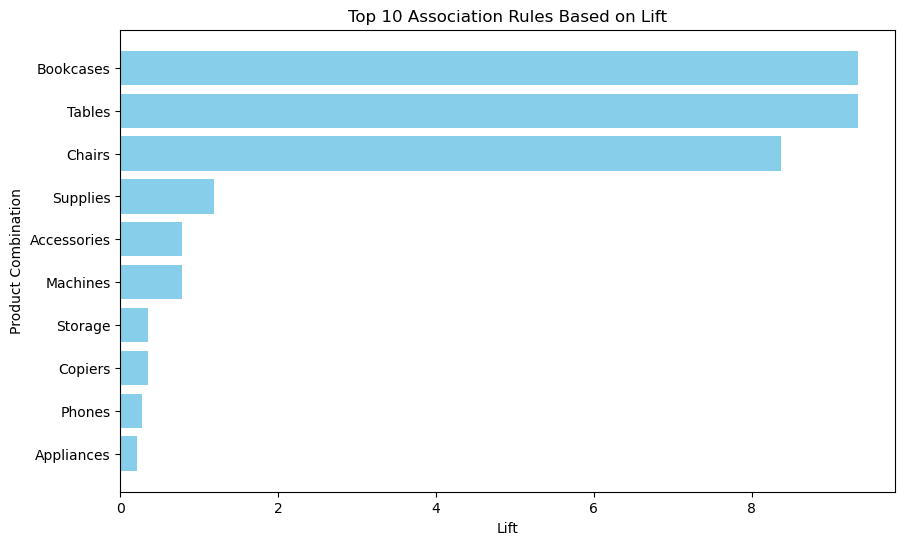

In [8]:
import matplotlib.pyplot as plt

# Plot the top 10 association rules based on lift
top_n = 10
plt.figure(figsize=(10, 6))
plt.barh(rules_ordered['antecedents'].apply(lambda x: list(x)[0]),
         rules_ordered['lift'],
         color='skyblue')
plt.xlabel('Lift')
plt.ylabel('Product Combination')
plt.title('Top {} Association Rules Based on Lift'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to display highest lift at the top
plt.show()


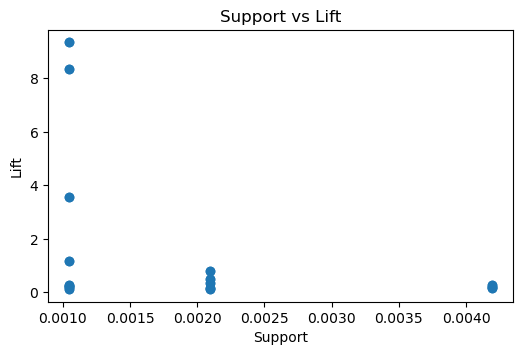

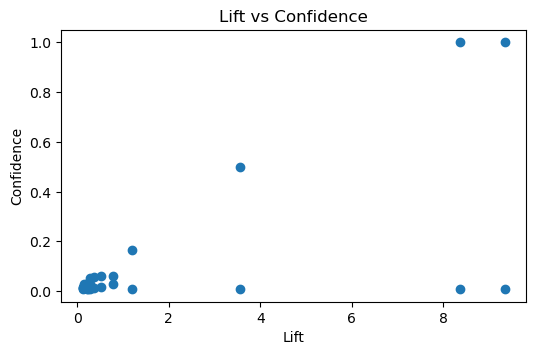

In [9]:
#SCATTER PLOTS TO SHOW REL BETWEEN SUPPORT,LIFT AND CONFIDENCE
# Plot 1
plt.figure(figsize=(6, 12))
plt.subplot(3, 1, 1)  # 1 row, 2 columns
x1 = rules_ordered['support']
y1 = rules_ordered['lift']
plot1 = plt.scatter(x1, y1)
plt.title('Support vs Lift')
plt.xlabel('Support')
plt.ylabel('Lift')

# Plot 2
plt.figure(figsize=(6, 12))
plt.subplot(3, 1, 2)  # 1 row, 2 columns, 2nd subplot
x2 = rules_ordered['lift']
y2 = rules_ordered['confidence']
plot2 = plt.scatter(x2, y2)
plt.title('Lift vs Confidence')
plt.xlabel('Lift')
plt.ylabel('Confidence')

# Plot 3
plt.figure(figsize=(6,12))
plt.subplot(3, 1, 3)  # 1 row, 2 columns, 2nd subplot
x3 = rules_ordered['support']
y3 = rules_ordered['confidence']
plot3= plt.scatter(x3, y3)
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


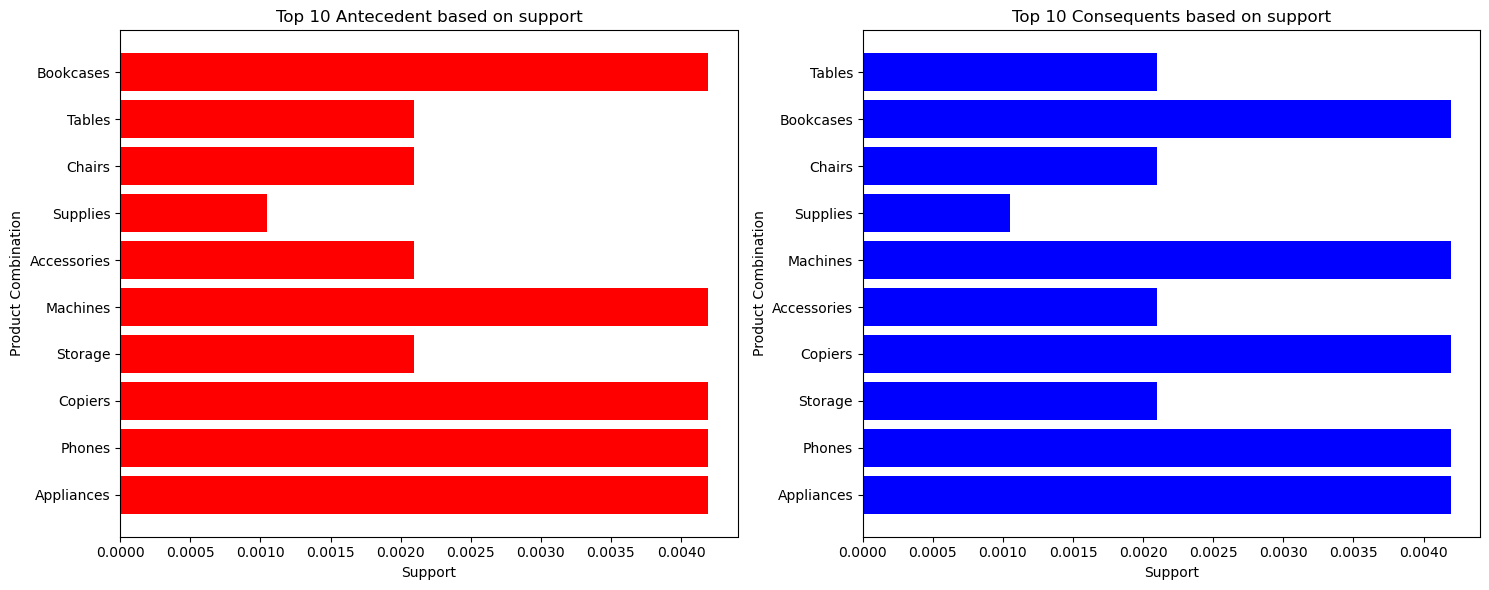

In [10]:
# Plot the top 10 Antecendents and Consequents based on support
top_n = 10
plt.figure(figsize=(15, 6))

# Subplot 1: Support
plt.subplot(1, 2, 1)
plt.barh(rules_ordered['antecedents'].apply(lambda x: list(x)[0]),
         rules_ordered['support'],
         color='red')
plt.xlabel('Support')
plt.ylabel('Product Combination')
plt.title('Top {} Antecedent based on support'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to display highest support at the top

# Subplot 2: Confidence
plt.subplot(1, 2, 2)
plt.barh(rules_ordered['consequents'].apply(lambda x: list(x)[0]),
         rules_ordered['support'],
         color='blue')
plt.xlabel('Support')
plt.ylabel('Product Combination')
plt.title('Top {} Consequents based on support'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to display highest confidence at the top

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

#CREATE HEATMAP TO SHOW THE LIFT VALUES OF ANTICEDENTS AND CONSEQUENTS

# pivot table for heatmap
heatmap_data = assc_rules.pivot(index='antecedents', columns='consequents', values='lift')

#  heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Heatmap of lift values')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()




In [12]:
rules_ordered.to_csv('../draft/association_rules.csv', index=False)